In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Training Image preprocessing

In [3]:
# image_dataset_from_directory function REF=https://keras.io/api/data_loading/image/

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


# Validation Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


# To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Modal

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
# To avoid Overfitting
model.add(Dropout(0.25)) 

In [13]:
model.add(Flatten())

In [14]:
# units are the number of neurons I change this 1024 to 1500
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                   

# Model Training

In [19]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2197/2197 [==============================] - 2062s 937ms/step - loss: 1.3727 - accuracy: 0.5969 - val_loss: 0.6100 - val_accuracy: 0.8076
Epoch 2/10
2197/2197 [==============================] - 2134s 970ms/step - loss: 0.4374 - accuracy: 0.8612 - val_loss: 0.2803 - val_accuracy: 0.9106
Epoch 3/10
2197/2197 [==============================] - 2037s 926ms/step - loss: 0.2618 - accuracy: 0.9156 - val_loss: 0.2655 - val_accuracy: 0.9145
Epoch 4/10
2197/2197 [==============================] - 2064s 938ms/step - loss: 0.1812 - accuracy: 0.9415 - val_loss: 0.1847 - val_accuracy: 0.9397
Epoch 5/10
2197/2197 [==============================] - 2057s 936ms/step - loss: 0.1368 - accuracy: 0.9543 - val_loss: 0.1719 - val_accuracy: 0.9459
Epoch 6/10
2197/2197 [==============================] - 2108s 959ms/step - loss: 0.1054 - accuracy: 0.9649 - val_loss: 0.1125 - val_accuracy: 0.9653
Epoch 7/10
2197/2197 [==============================] - 1984s 903ms/step - loss: 0.0859 - accuracy: 0.97

# Model Evaluation

In [20]:
# Model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 795s 360ms/step - loss: 0.0413 - accuracy: 0.9870


In [21]:
print(train_loss, train_acc)

0.04134257137775421 0.9869834184646606


In [22]:
# Model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 210s 375ms/step - loss: 0.1319 - accuracy: 0.9616


In [23]:
print(val_loss, val_acc)

0.1318930983543396 0.961586594581604


# Saving Model

In [25]:
# model.save(plant_Disease_Trained_Model.h5) # h5> extention is old version it save model with large size but in keras the size is compressed
model.save("plant_Disease_Trained_Model.keras")

In [26]:
training_history.history

{'loss': [1.3727095127105713,
  0.43741223216056824,
  0.26175060868263245,
  0.18117879331111908,
  0.136750265955925,
  0.10542468726634979,
  0.08593042939901352,
  0.07384628802537918,
  0.06546317040920258,
  0.05429727956652641],
 'accuracy': [0.5968987941741943,
  0.8612419366836548,
  0.915570080280304,
  0.9415178894996643,
  0.9542641639709473,
  0.9648765921592712,
  0.9711644053459167,
  0.9761434197425842,
  0.9790312051773071,
  0.9824027419090271],
 'val_loss': [0.6100433468818665,
  0.2802932858467102,
  0.2654820382595062,
  0.18466220796108246,
  0.17188070714473724,
  0.11245054751634598,
  0.18552321195602417,
  0.16784526407718658,
  0.11558201164007187,
  0.13189302384853363],
 'val_accuracy': [0.8076485395431519,
  0.9105964303016663,
  0.9145231246948242,
  0.9396767616271973,
  0.9459367394447327,
  0.9653425812721252,
  0.9440017938613892,
  0.9492943286895752,
  0.9642044305801392,
  0.961586594581604]}

In [27]:
# Recording history in json
import json
with open("plant_Disease_training_history.json",'w') as f:
    json.dump(training_history.history, f)

# Accuracy Visualization

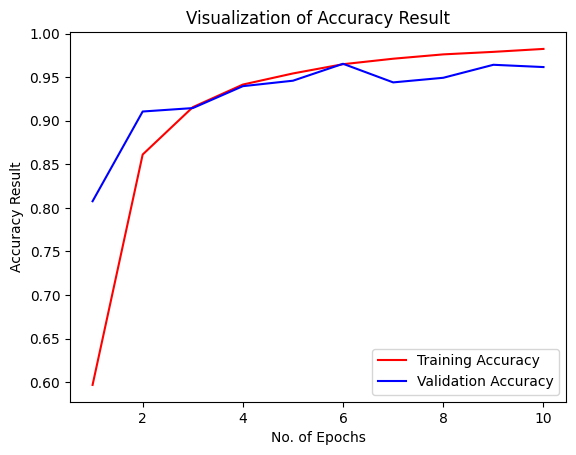

In [36]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [38]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

17572/17572 [==============================] - 444s 25ms/step


(array([[9.99999404e-01, 1.48474825e-07, 1.12677390e-09, ...,
         2.32135302e-13, 5.13336899e-12, 1.64090172e-12],
        [9.99999762e-01, 1.10231035e-07, 3.76899151e-10, ...,
         1.60625961e-13, 5.36111520e-12, 2.62857422e-12],
        [9.99999881e-01, 1.45503813e-08, 1.10762621e-10, ...,
         3.12902123e-15, 6.50812276e-14, 1.63837815e-13],
        ...,
        [1.10806559e-06, 1.56566593e-10, 1.44775377e-05, ...,
         6.28323448e-07, 5.83218061e-08, 9.99776542e-01],
        [4.24189919e-11, 1.94286166e-14, 4.99817432e-09, ...,
         1.27110455e-09, 2.47457610e-10, 9.99999642e-01],
        [1.51265532e-14, 1.04503239e-16, 4.24447600e-14, ...,
         1.25677700e-14, 8.79204953e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [43]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[495,   0,   0, ...,   0,   1,   0],
       [  3, 483,   0, ...,   0,   0,   0],
       [  8,   0, 417, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 486,   1,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 479]], dtype=int64)

In [46]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.89      0.98      0.94       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.97       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.95      0.93       410
                       Corn_(maize)___Common_rust_       0.95      0.99      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

# Confusion Matrix Visualization

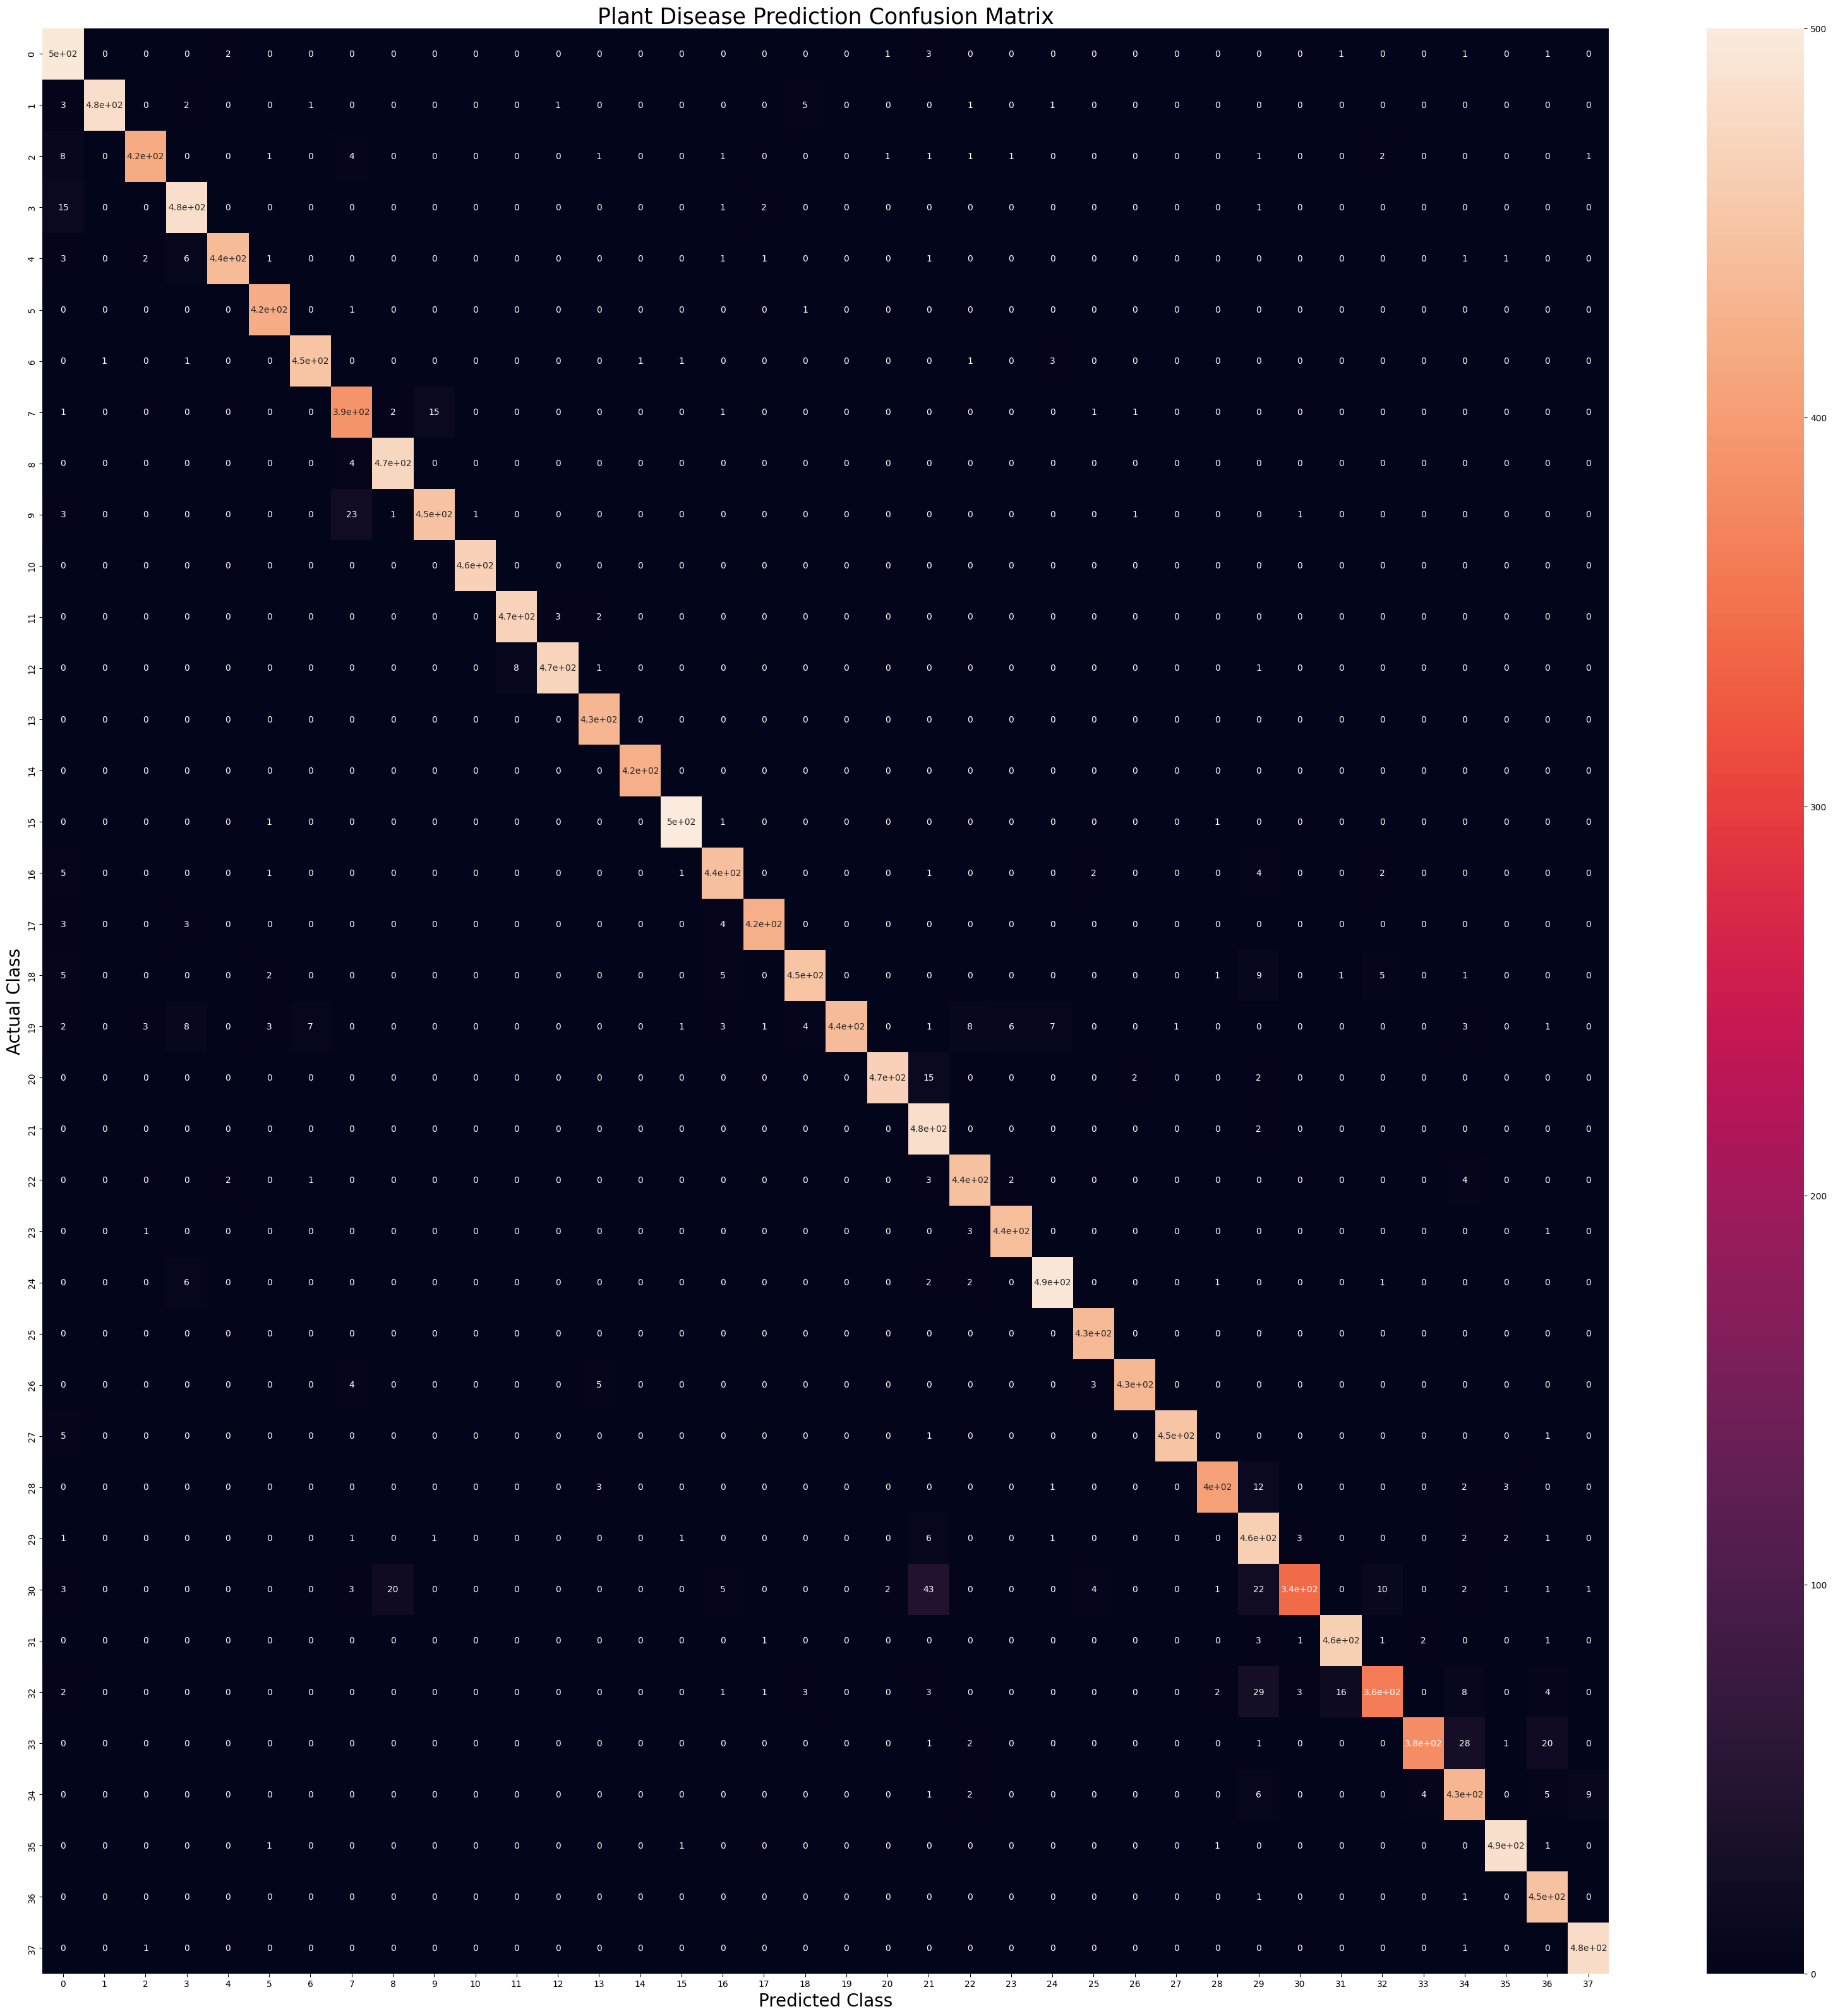

In [48]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()